## Практическое задание 4. Метод Ньютона

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as scopt

### Метод Ньютона

In [2]:
def Newton(f, grad_f, hess_f, x, alpha=1, accuracy=1e-6, max_iter=100):
    iter_count = 0
    
    # Saving path to analize
    path = [x]
                     
    while True:
        # Making step
        x = x - alpha * grad_f(x) / hess_f(x)
        
        iter_count += 1
        
        # Saving path
        path.append(x)
        
        # If the required accuracy or max iterations is achieved then stop
        if np.linalg.norm(grad_f(x)) < accuracy or iter_count >= max_iter:
            break
    
    return {"x": x, "iterations": iter_count, "path": path}

### Метод простых итераций

In [3]:
def MSI(f, x_0, l=1, accuracy=1e-6, max_iter=100):
    iter_count = 0
    
    # Local copy of arg
    if (type(x_0) == list):
        x = x_0.copy()
    else:
        x = x_0
    
    # Saving path to analize
    path = [x]
                     
    while True:
        # Making step
        x -= l * f(x)
        
        iter_count += 1
        
        # Saving path
        path.append(x)
        
        # If the required accuracy or max iterations is achieved then stop
        if np.linalg.norm(f(x)) < accuracy or iter_count >= max_iter:
            break
    
    return {"x": x, "iterations": iter_count, "path": path}

### Тестирование

In [4]:
def test_Newton(start, end, points):
    X = np.linspace(start, end, 100)
    Y = f(X)
    
    plt.figure(figsize=(15,10))
    plt.plot(X, Y, label="$f$")
    
    for p in points:
        res = Newton(f, df, ddf, p)
        plt.plot(res["path"], f(np.array(res["path"])), "o--", label=f'{res["iterations"]} iters from {p}')
    
    plt.legend(fontsize=20)
    plt.xlabel("$x$")
    plt.xlabel("$y$")
    plt.title("Newton test")
    
    
def test_MSI(start, end, points, l):
    X = np.linspace(start, end, 100)
    Y = f(X)
    
    plt.figure(figsize=(15,10))
    plt.plot(X, Y, label="$f$")
    
    for p in points:
        res = MSI(df, p, l)
        plt.plot(res["path"], f(res["path"]), "o--", label=f'{res["iterations"]} iters from {p}')
    
    plt.legend(fontsize=20)
    plt.xlabel("$x$")
    plt.xlabel("$y$")
    plt.title("Newton test")

$f(x)=\sin e^x - \sqrt{x}$

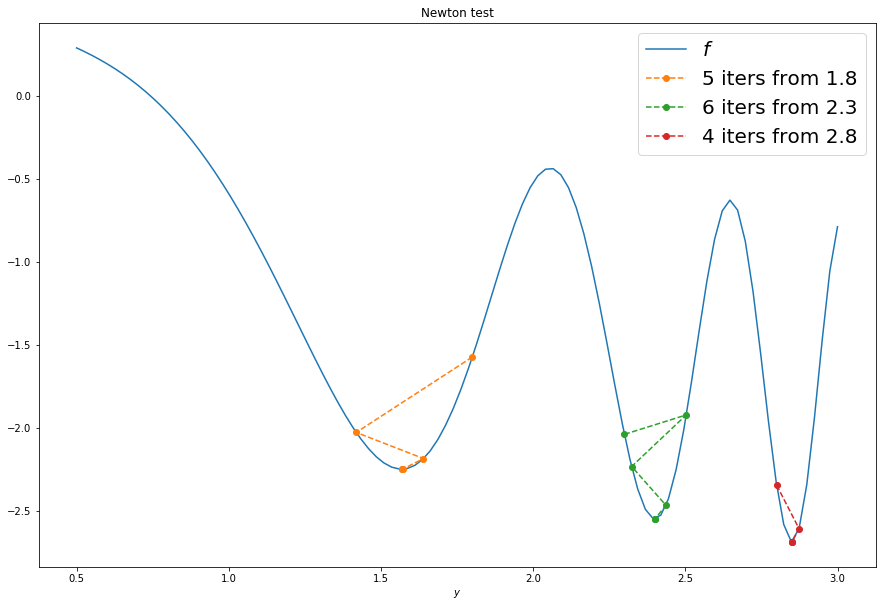

In [5]:
def f(x):
    return np.sin(np.exp(x)) - np.sqrt(x)

def df(x):
    return np.cos(np.exp(x)) * np.exp(x) - 1 / (2 * np.sqrt(x))

def ddf(x):
    return -np.sin(np.exp(x)) * np.exp(2 * x) + np.cos(np.exp(x)) * np.exp(x) + 1 / (4 * x * np.sqrt(x))

test_Newton(0.5, 3, [1.8, 2.3, 2.8])

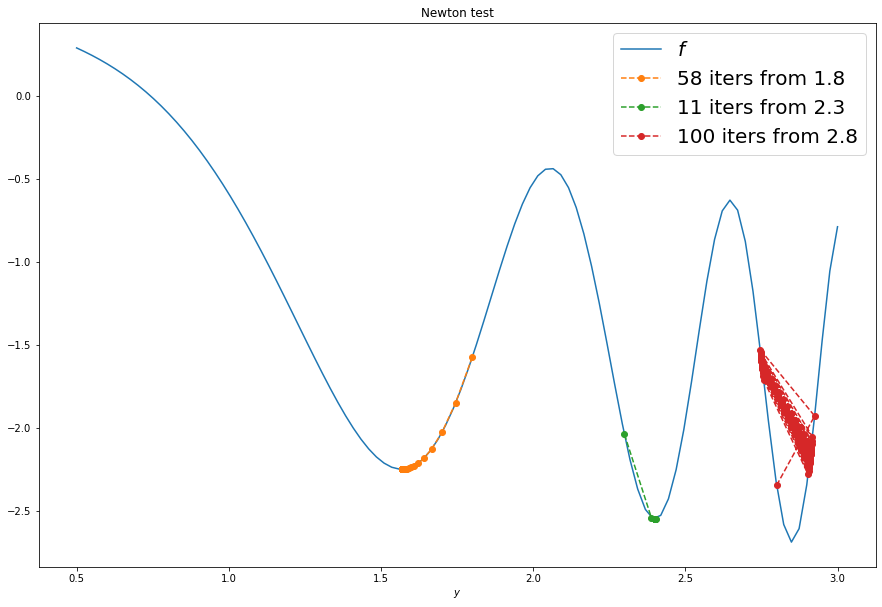

In [6]:
test_MSI(0.5, 3, [1.8, 2.3, 2.8], 0.01)

$f(x)=\sqrt x + e^{\frac{1}{10}x\sin x}$

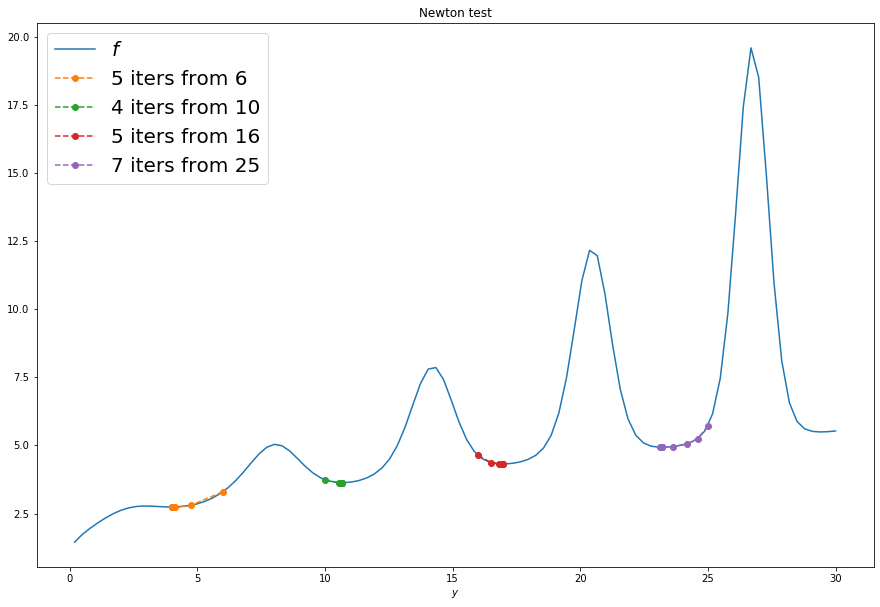

In [7]:
def f(x):
    return np.sqrt(x) + np.exp(0.1 * x * np.sin(x))

def df(x):
    return (5 / np.sqrt(x) + np.exp(x * np.sin(x) / 10) * (np.sin(x) + x * np.cos(x))) / 10

def ddf(x):
    return -1/(4 * x * np.sqrt(x)) + np.exp(x * np.sin(x) / 10) * (np.sin(x) / 10 + x * np.cos(x) / 10) ** 2 + np.exp(x * np.sin(x) / 10) * (np.cos(x) / 5 - x * np.sin(x) / 10)

test_Newton(0.2, 30, [6, 10, 16, 25])


$f(x)=x^2-7x$

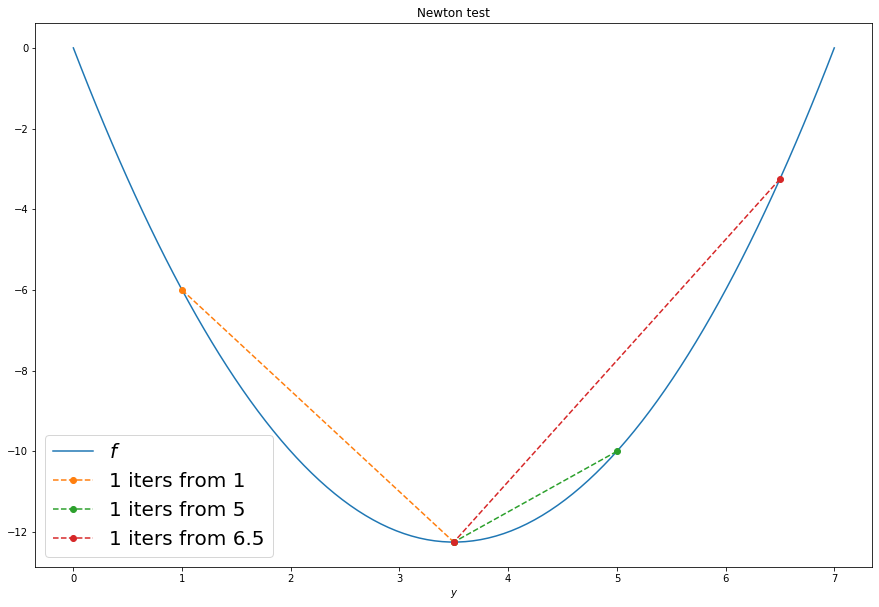

In [8]:
def f(x):
    return np.power(x, 2) - 7 * x

def df(x):
    return 2 * x - 7

def ddf(x):
    return 2

test_Newton(0, 7, [1, 5, 6.5])

### BFGS

In [9]:
import scipy as sp

def BFGS(f, grad_f, x_0, accuracy=1e-6, max_iter=100):
    iter_count = 0
    
    # Local copy of arg
    x = x_0.copy()
    x_prev = x
    
    # Take identity matrix as first approximation of hessian
    H = np.eye(x.shape[0])
    I = np.eye(x.shape[0])
    
    # Saving path to analize
    path = [x]
                     
    while np.linalg.norm(grad_f(x)) > accuracy and iter_count < max_iter:
        # Step direction
        step = -np.dot(H, grad_f(x))
        
        # Finding optimal alpha
        alpha = sp.optimize.line_search(f, grad_f, x, step)[0]
        
        # Making step
        x_prev = x
        x = x + alpha * step
        
        iter_count += 1
        
        # Saving path
        path.append(x)
            
        # Updating hessian
        dx = x - x_prev
        dy = grad_f(x) - grad_f(x_prev)
        rho = 1. / np.dot(dy, dx)
        H = np.dot((I - rho * np.outer(dx, dy)), np.dot(H, (I - rho * np.outer(dy, dx)))) + rho * np.outer(dx, dx)
        
    return {"x": x, "iterations": iter_count, "path": path}

### Gradient descent

In [10]:
def GradDec(f, grad_f, x_0, alpha=0.01, accuracy=1e-6, max_iter=1000):
    iter_count = 0
    
    # Local copy of arg
    x = x_0.copy()
    
    # Saving path to analize
    path = [x]
                     
    while True:
        # Making step
        x = x - alpha * grad_f(x)
        
        iter_count += 1
        
        # Saving path
        path.append(x)
        
        # If the required accuracy or max iterations is achieved then stop
        if np.linalg.norm(grad_f(x)) < accuracy or iter_count >= max_iter:
            break
    
    return {"x": x, "iterations": iter_count, "path": path}

### Newton

In [11]:
def Newton(f, grad_f, hess_f, x_0, alpha=1, accuracy=1e-6, max_iter=100):
    iter_count = 0
    
    # Local copy of arg
    x = x_0.copy()
    
    # Saving path to analize
    path = [x]
                     
    while True:
        # Making step
        x = x - alpha * np.linalg.inv(hess_f(x)) @ grad_f(x)
        
        iter_count += 1
        
        # Saving path
        path.append(x)
        
        # If the required accuracy or max iterations is achieved then stop
        if np.linalg.norm(grad_f(x)) < accuracy or iter_count >= max_iter:
            break
    
    return {"x": x, "iterations": iter_count, "path": np.array(path)}

### Testing

In [12]:
def plot_comparation(X, Y, f, paths_info):
    x, y = np.meshgrid(X, Y)

    plt.figure(figsize=(10, 10))
    plt.contourf(x, y, f(np.array([x,y])), levels=50)
    
    for path_info in paths_info:
        path = path_info["path"]
        plt.plot(path[:, 0].squeeze(), path[:, 1].squeeze(), path_info["style"], label=path_info["name"])
    
    plt.title("Methods comparasion")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend()

(100, 100)


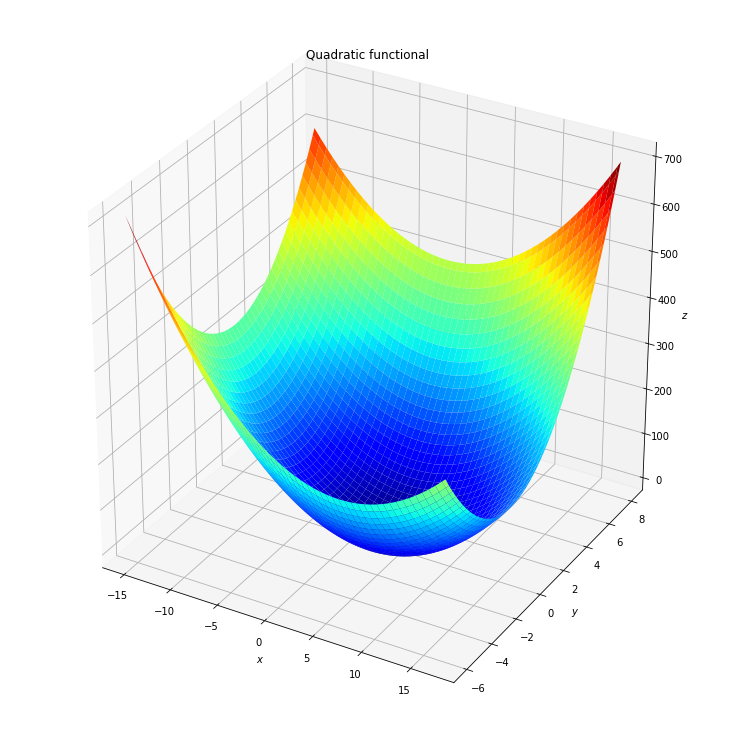

In [13]:
def f(a):
    x = a[0]
    y = a[1]
    return x ** 2 + 7 * y ** 2 + x * y - 7 * x - 7 * y

def grad_f(a):
    x = a[0]
    y = a[1]
    return np.array([2 * x + y - 7, 14 * y + x - 7])

def hess_f(a):
    return np.array([[2, 1], [1, 14]])

X = np.linspace(-15, 17, 100)
Y = np.linspace(-6, 8, 100)
x, y = np.meshgrid(X, Y)
print(f(np.array([x, y])).shape)

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.plot_surface(x, y, f(np.array([x, y])), cmap='jet')
ax.set(xlabel='$x$', ylabel='$y$', zlabel='$z$')
ax.set_title('Quadratic functional')
plt.show()


- Gradient descent:
| Argmin: [3.37036989 0.2592593 ] 
| Min: -12.703703703703479 
| Iterations:  78

- BFGS:
| Argmin: [3.37037037 0.25925926] 
| Min: -12.703703703703706 
| Iterations:  2

- Newton:
| Argmin: [3.37037037 0.25925926] 
| Min: -12.703703703703704 
| Iterations:  1


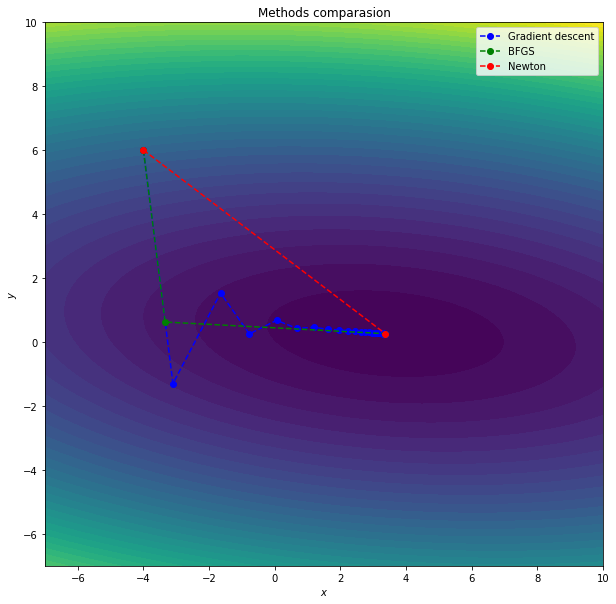

In [14]:
def compare_GBN(x0, X, Y, alpha=0.1):
    paths_info = []

    res = GradDec(f, grad_f, x0, alpha=alpha)
    print("\n- Gradient descent:\n| Argmin:", res["x"], "\n| Min:", f(res["x"]), "\n| Iterations: ", res["iterations"])
    paths_info.append({"path": np.array(res["path"]), "name": "Gradient descent", "style": "bo--"})

    res = BFGS(f, grad_f, x0)
    print("\n- BFGS:\n| Argmin:", res["x"], "\n| Min:", f(res["x"]), "\n| Iterations: ", res["iterations"])
    paths_info.append({"path": np.array(res["path"]), "name": "BFGS", "style": "go--"})
    
    res = Newton(f, grad_f, hess_f, x0)
    print("\n- Newton:\n| Argmin:", res["x"], "\n| Min:", f(res["x"]), "\n| Iterations: ", res["iterations"])
    paths_info.append({"path": np.array(res["path"]), "name": "Newton", "style": "ro--"})

    plot_comparation(X, Y, f, paths_info)

X = np.linspace(-7, 10, 100)
compare_GBN(np.array([-4, 6]), X, X)


- Gradient descent:
| Argmin: [3.37037088 0.25925922] 
| Min: -12.703703703703457 
| Iterations:  68

- BFGS:
| Argmin: [3.37037037 0.25925926] 
| Min: -12.703703703703702 
| Iterations:  2

- Newton:
| Argmin: [3.37037037 0.25925926] 
| Min: -12.703703703703706 
| Iterations:  1


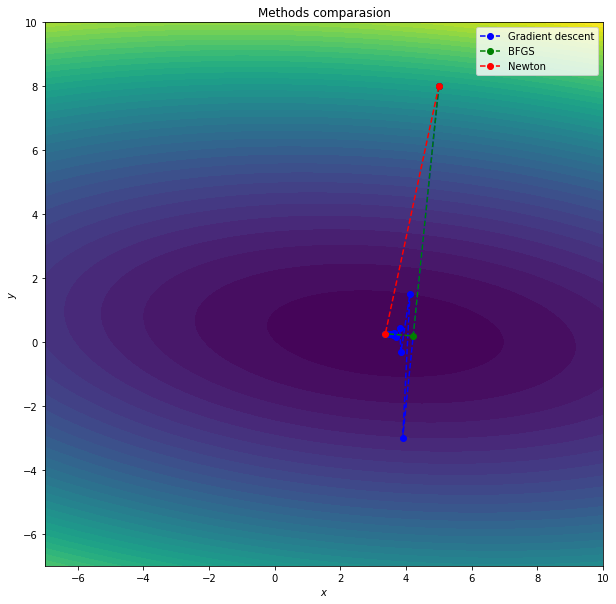

In [15]:
compare_GBN(np.array([5, 8]), X, X)

(100, 100)


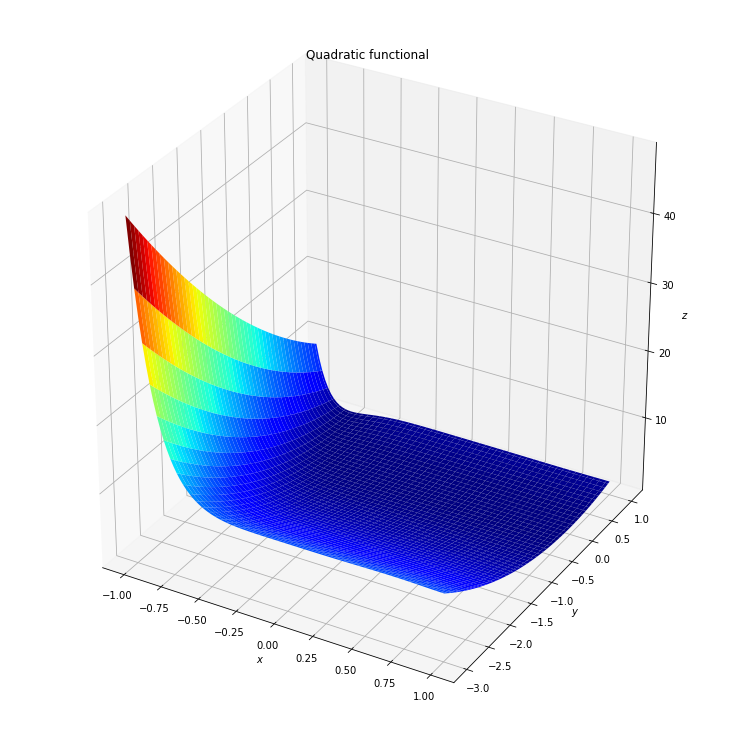

In [16]:
def f(a):
    x = a[0]
    y = a[1]
    return ((x ** 3 - x ** 2) ** 2 - y) ** 2

def grad_f(a):
    x = a[0]
    y = a[1]
    return np.array([4 * (x - 1) * x ** 3 * (3 * x - 2) * (x ** 6 - 2 * x ** 5 + x ** 4 - y), 2 * y - 2 * (x - 1) ** 2 * x ** 4])

def hess_f(a):
    x = a[0]
    y = a[1]
    return np.array([[4 * x ** 2 * (33 * x ** 8 - 110 * x ** 7 + 135 * x ** 6 - 72 * x ** 5 + 14 * x ** 4 - 15 ** x ** 2 * y + 20 * x * y - 6 * y),
                      -4 * (x - 1) * x ** 3 * (3 * x - 2)],
                     [-4 * x ** 3 * (3 * x ** 2 - 5 * x + 2),
                      2]])

X = np.linspace(-1, 1, 100)
Y = np.linspace(-3, 1, 100)
x, y = np.meshgrid(X, Y)
print(f(np.array([x, y])).shape)

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.plot_surface(x, y, f(np.array([x, y])), cmap='jet')
ax.set(xlabel='$x$', ylabel='$y$', zlabel='$z$')
ax.set_title('Quadratic functional')
plt.show()


- Gradient descent:
| Argmin: [0.63242894 0.02161416] 
| Min: 1.8831596220460102e-13 
| Iterations:  27

- BFGS:
| Argmin: [0.84376245 0.01237233] 
| Min: 6.5879729416395804e-21 
| Iterations:  5

- Newton:
| Argmin: [-0.7       0.693889] 
| Min: 0.0 
| Iterations:  1


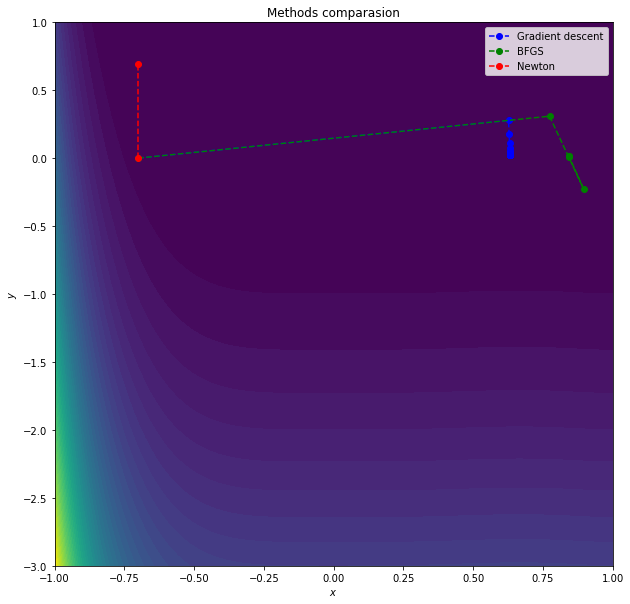

In [17]:
compare_GBN(np.array([-0.7, 0]), X, Y, 0.2)


- Gradient descent:
| Argmin: [0.49803132 0.01550125] 
| Min: 2.2264537610167432e-13 
| Iterations:  144

- BFGS:
| Argmin: [0.86848589 0.00984009] 
| Min: 5.6295052174608645e-15 
| Iterations:  3

- Newton:
| Argmin: [-0.7       0.693889] 
| Min: 4.930380657631324e-32 
| Iterations:  1


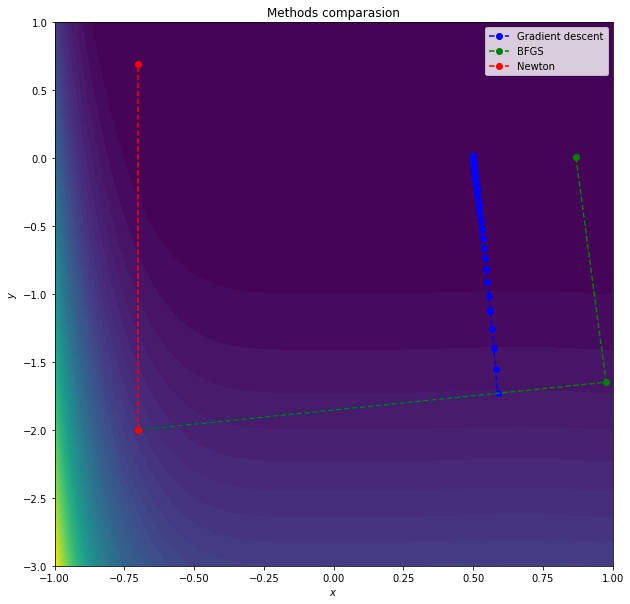

In [18]:
compare_GBN(np.array([-0.7, -2]), X, Y, 0.05)


- Gradient descent:
| Argmin: [0.54575498 0.01830504] 
| Min: 4.887320376085258e-16 
| Iterations:  3

- BFGS:
| Argmin: [0.54573605 0.01830385] 
| Min: 4.0046089793103084e-14 
| Iterations:  2

- Newton:
| Argmin: [0.5      0.015625] 
| Min: 0.0 
| Iterations:  1


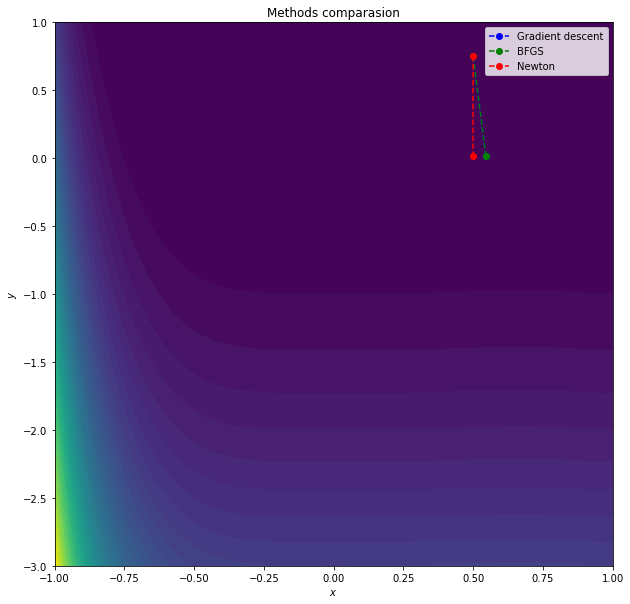

In [19]:
compare_GBN(np.array([0.5, 0.75]), X, Y, 0.5)

---
## Дополнительно

Проверим корректность реализации на простой квадратичной функции
$$f(x, y) = x^2 + 2y^2 + xy - 7x - 7y.$$
Нетрудно посчитать, что $(3, 1)$ --- её минимум.

In [20]:
def f(a):
    x = a[0]
    y = a[1]
    return x ** 2 + 2 * y ** 2 + x * y - 7 * x - 7 * y

def grad_f(a):
    x = a[0]
    y = a[1]
    return np.array([2 * x + y - 7, 4 * y + x - 7])

def hess_f(a):
    return np.array([[2, 1], [1, 4]])

res = Newton(f, grad_f, hess_f, [0, 0])
print("Argmin:", res["x"], "\nMin:", f(res["x"]), "\nIterations: ", res["iterations"])

Argmin: [3. 1.] 
Min: -14.0 
Iterations:  1


Все верно. На квадратичной фукнции, как и ожидалось, метод Ньютона пришел в точку минимума за один шаг.

Рассмотрим теперь функцию Розенброка:
$$rosen(x, y) = (1 - x)^2 + 100(y - x^2)^2.$$
Её многомерное обобщение:
$$rosen(x) = \sum_{i = 1}^{n - 1} \left(\left(1 - x_i^2\right)^2 + 100\left(x_{i + 1} - x_i^2\right)^2 \right).$$
Её глобальный минимум $rosen(x_{min}) = 0$ в точке $x_{min} = (1, \dots, 1)$.

In [21]:
def rosen(x):
    return sum(100.0 * (x[1:] - x[:-1] ** 2)**2 + (1-x[:-1])**2)

def rosen_grad(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

(100, 100)


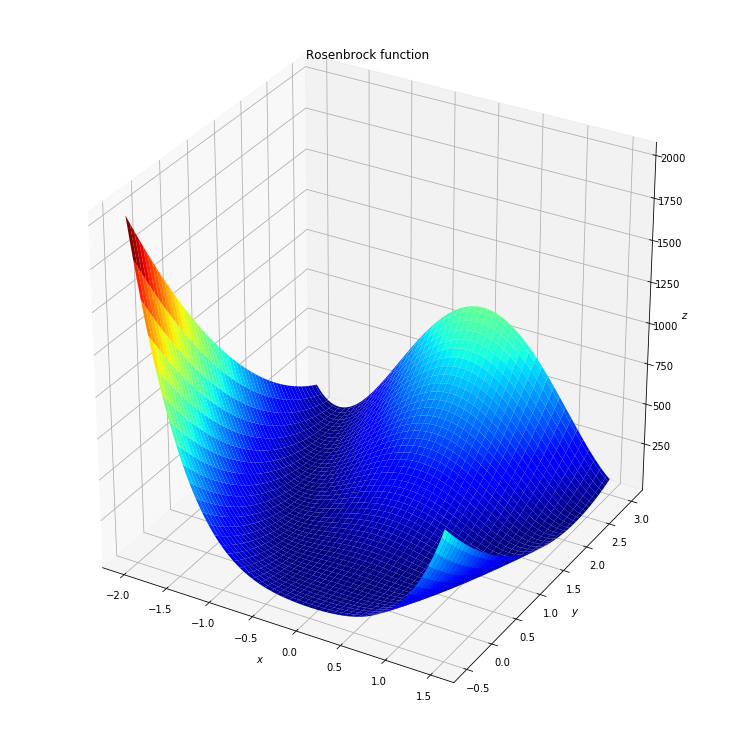

In [22]:
X = np.linspace(-2, 1.5, 100)
Y = np.linspace(-0.5, 3, 100)
x, y = np.meshgrid(X, Y)
print(rosen(np.array([x, y])).shape)

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.plot_surface(x, y, rosen(np.array([x, y])), cmap='jet')
ax.set(xlabel='$x$', ylabel='$y$', zlabel='$z$')
ax.set_title('Rosenbrock function')
plt.show()

Посмотрим как на ней ведет себя метод Ньютона.

In [23]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = Newton(rosen, rosen_grad, rosen_hess, x0)
print("Argmin:", res["x"], "\nMin:", rosen(res["x"]), "\nIterations: ", res["iterations"])

Argmin: [1.         1.         1.         0.99999999 0.99999999] 
Min: 4.3689477573317777e-17 
Iterations:  19


Сравним метод Ньютона с методами более низкого порядка. Метод первого порядка --- градиентный спуск, нулевого --- метод Нелдера-Мида.

In [24]:
def GradDec(f, grad_f, x_0, alpha=0.01, accuracy=1e-3, max_iter=1000):
    iter_count = 0
    
    # Local copy of arg
    x = x_0.copy()
    
    # Saving path to analize
    path = [x]
                     
    while True:
        # Making step
        x = x - alpha * grad_f(x)
        
        iter_count += 1
        
        # Saving path
        path.append(x)
        
        # If the required accuracy or max iterations is achieved then stop
        if np.linalg.norm(grad_f(x)) < accuracy or iter_count >= max_iter:
            break
    
    return {"x": x, "iterations": iter_count, "path": path}


def NelderMead(func, simplex, alpha=1, beta=0.5, gamma=2, accuracy=0.0001):
    iter_count = 0
    
    # Make a local copy of simplex
    simplex = np.copy(simplex)
    
    # Saving path as mean of simplex
    path = []
    
    n = simplex.shape[1]

    while np.all(np.var(simplex, axis=0) > accuracy):
        path.append(simplex.mean(axis=0))
        iter_count += 1
        
        # Ordering
        func_on_simplex = np.zeros(n + 1)

        for i, x in enumerate(simplex):
            func_on_simplex[i] = func(x)

        index_ordered = np.argsort(func_on_simplex)
        simplex_ordered = simplex[index_ordered]

        # Centroid calculation
        centroid = np.sum(simplex_ordered[:n], axis=0) / n

        # Reflection
        x_r = centroid + alpha * (centroid - simplex_ordered[n])

        if func(x_r) < func(simplex_ordered[0]):
            # Expansion
            x_e = centroid + gamma * (x_r - centroid)
            if func(x_e) < func(x_r):
                simplex[index_ordered[n]] = x_e
            else:
                simplex[index_ordered[n]] = x_r
            continue
        elif func(x_r) < func(simplex_ordered[n - 1]):
            simplex[index_ordered[n]] = x_r
            continue
        else:
            # Contraction
            x_c = centroid + beta * (simplex_ordered[n] - centroid)
            if func(x_c) < func(simplex_ordered[n]):
                simplex[index_ordered[n]] = x_c
            else:
                for i, x_i in enumerate(simplex_ordered[1:]):
                    simplex[i + 1] = simplex_ordered[0] + (x_i - simplex_ordered[0]) / 2
                    
    path.append(simplex.mean(axis=0))
    return {"x": np.mean(simplex, axis=0), "iterations": iter_count, "path": path}

Сравнивать будем на двумерной функции Розенброка, чтобы визуализировать пути методов.

- Newton:
| Argmin: [1. 1.] 
| Min: 1.67632942359465e-30 
| Iterations:  5

- Gradient descent:
| Argmin: [0.95750425 0.91663995] 
| Min: 0.001808931682072844 
| Iterations:  1000

- Nelder-Mead:
| Argmin: [0.99869796 0.99648755] 
| Min: 8.45173821955456e-05 
| Iterations:  36


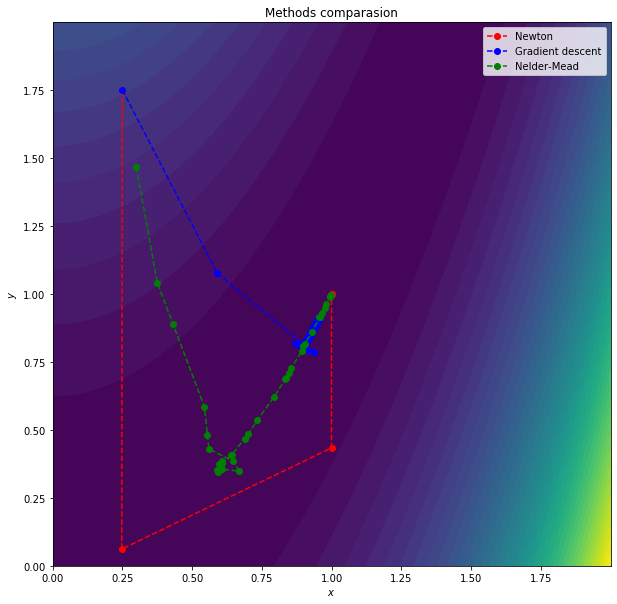

In [25]:
def plot_comparation(X, Y, f, paths_info):
    x, y = np.meshgrid(X, Y)

    plt.figure(figsize=(10, 10))
    plt.contourf(x, y, f(np.array([x,y])), levels=50)
    
    for path_info in paths_info:
        path = path_info["path"]
        plt.plot(path[:, 0].squeeze(), path[:, 1].squeeze(), path_info["style"], label=path_info["name"])
    
    plt.title("Methods comparasion")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend()


x0 = np.array([0.25, 1.75])

res = Newton(rosen, rosen_grad, rosen_hess, x0)
print("- Newton:\n| Argmin:", res["x"], "\n| Min:", rosen(res["x"]), "\n| Iterations: ", res["iterations"])
paths_info = [{"path": np.array(res["path"]), "name": "Newton", "style": "ro--"}]

res = GradDec(rosen, rosen_grad, x0, alpha=0.002, accuracy=0.01)
print("\n- Gradient descent:\n| Argmin:", res["x"], "\n| Min:", rosen(res["x"]), "\n| Iterations: ", res["iterations"])
paths_info.append({"path": np.array(res["path"]), "name": "Gradient descent", "style": "bo--"})

simplex = [[0.25, 1.75], [0.15, 1.65], [0.5, 1.]]

res = NelderMead(rosen, simplex)
print("\n- Nelder-Mead:\n| Argmin:", res["x"], "\n| Min:", rosen(res["x"]), "\n| Iterations: ", res["iterations"])
paths_info.append({"path": np.array(res["path"]), "name": "Nelder-Mead", "style": "go--"})

X = np.arange(0, 2, 1e-3)
plot_comparation(X, X, rosen, paths_info)

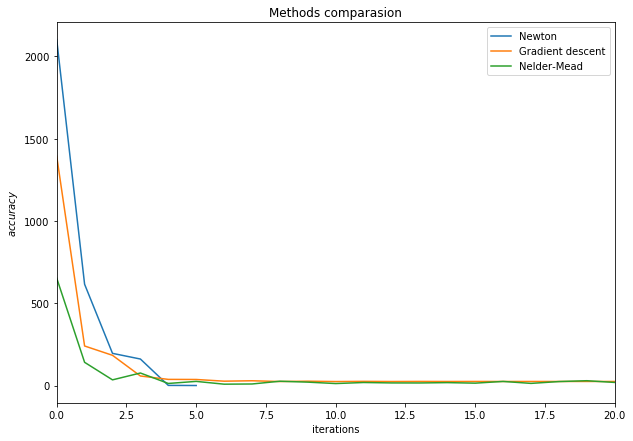

In [26]:
plt.figure(figsize=(10, 7))
for id in range(3):
    plt.plot(np.linalg.norm(rosen_grad(paths_info[id]["path"]), axis=1), label=paths_info[id]["name"])

plt.title("Methods comparasion")
plt.xlabel("iterations")
plt.ylabel("$accuracy$")
plt.xlim(0, 20)
plt.legend()
plt.show()

Заметим, что метод Ньютона всего за пять итераций попал в точную точку минимума, алгоритм Нелдера-Мида достиг заданной точности за $36$ шагов, в то время как градиентный спуск не достиг достаточной точности даже за $1000$ итераций. На данном примере хорошо видно преимущество метода Ньютона над методами более низкого порядка, при соблюдении необходимых и достаточных условий его сходимости (функция дважды дифференцируема и обратный гессиан положительно определён).

BFGS
--------
Реализуем метод BFGS:

Проверим корректность реализации на все той же квадратичной функции:

In [27]:
def f(a):
    x = a[0]
    y = a[1]
    return x ** 2 + 2 * y ** 2 + x * y - 7 * x - 7 * y

def grad_f(a):
    x = a[0]
    y = a[1]
    return np.array([2 * x + y - 7, 4 * y + x - 7])

res = BFGS(f, grad_f, np.array([0, 0]))
print("Argmin:", res["x"], "\nMin:", f(res["x"]), "\nIterations: ", res["iterations"])

Argmin: [3. 1.] 
Min: -14.0 
Iterations:  3


Заметим, что в отличие от метода Ньютона, который сразу попал в искомую точку (так как функция квадратичная), BFGS сошелся за несколько шагов, поскольку здесь мы используем приближенное значение гессиана.

Посмотрим теперь как ведет себя метод на функции Розенброка:

In [28]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = BFGS(rosen, rosen_grad, x0)
print("Argmin:", res["x"], "\nMin:", rosen(res["x"]), "\nIterations: ", res["iterations"])

Argmin: [1.         1.         1.         1.         1.00000001] 
Min: 2.377379794162875e-16 
Iterations:  60


Вспомним, что метод Ньютона сошелся быстрее (за 19 шагов). Проверим, действительно ли BFGS эффективнее Ньютона на достаточно большой задаче:

In [29]:
np.random.seed(0)
# Generate 100-dimensional start point
x0 = np.random.uniform(-2, 2, 100)

In [30]:
%%time
res = Newton(rosen, rosen_grad, rosen_hess, x0, max_iter=10000)
print("Argmin:", res["x"], "\nMin:", rosen(res["x"]), "\nIterations: ", res["iterations"])

Argmin: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.] 
Min: 9.006572866328021e-29 
Iterations:  1118
CPU times: user 6.63 s, sys: 5.68 s, total: 12.3 s
Wall time: 1.75 s


In [31]:
%%time
res = BFGS(rosen, rosen_grad, x0, max_iter=10000)
print("Argmin:", res["x"], "\nMin:", rosen(res["x"]), "\nIterations: ", res["iterations"])

Argmin: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.] 
Min: 5.82332059809208e-17 
Iterations:  278
CPU times: user 2.21 s, sys: 2.53 s, total: 4.74 s
Wall time: 667 ms


Получили ускорение примерно в десять раз. Посмотрим на пути, проходимые методами в двумерном варианте из разных точек:

Start from  [0.25 1.75]

- Newton:
| Argmin: [1. 1.] 
| Min: 1.67632942359465e-30 
| Iterations:  5

- BFGS:
| Argmin: [1. 1.] 
| Min: 2.4405053943929857e-19 
| Iterations:  18


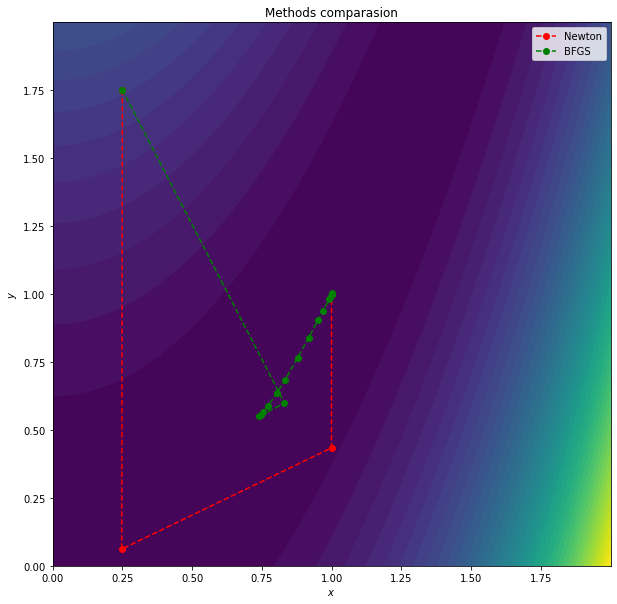

In [32]:
def compare_NB(x0):
    print("Start from ", x0)

    res = Newton(rosen, rosen_grad, rosen_hess, x0)
    print("\n- Newton:\n| Argmin:", res["x"], "\n| Min:", rosen(res["x"]), "\n| Iterations: ", res["iterations"])
    paths_info = [{"path": np.array(res["path"]), "name": "Newton", "style": "ro--"}]

    res = BFGS(rosen, rosen_grad, x0)
    print("\n- BFGS:\n| Argmin:", res["x"], "\n| Min:", rosen(res["x"]), "\n| Iterations: ", res["iterations"])
    paths_info.append({"path": np.array(res["path"]), "name": "BFGS", "style": "go--"})

    X = np.arange(0, 2, 1e-3)
    plot_comparation(X, X, rosen, paths_info)

compare_NB(np.array([0.25, 1.75]))

Start from  [1.4  1.75]

- Newton:
| Argmin: [1. 1.] 
| Min: 2.505828050585249e-19 
| Iterations:  5

- BFGS:
| Argmin: [1. 1.] 
| Min: 4.673236388413874e-18 
| Iterations:  15


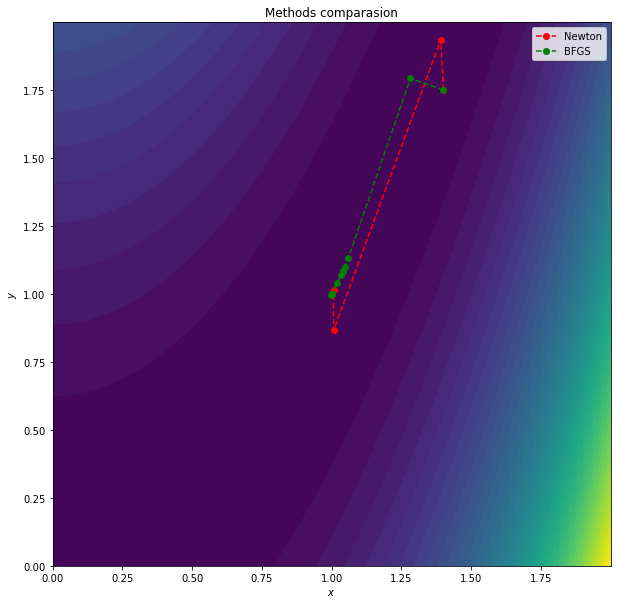

In [33]:
compare_NB(np.array([1.4, 1.75]))

Start from  [0.2 0.2]

- Newton:
| Argmin: [1. 1.] 
| Min: 1.0944201862449094e-18 
| Iterations:  6

- BFGS:
| Argmin: [1.00000001 1.00000003] 
| Min: 3.299444259309292e-16 
| Iterations:  20


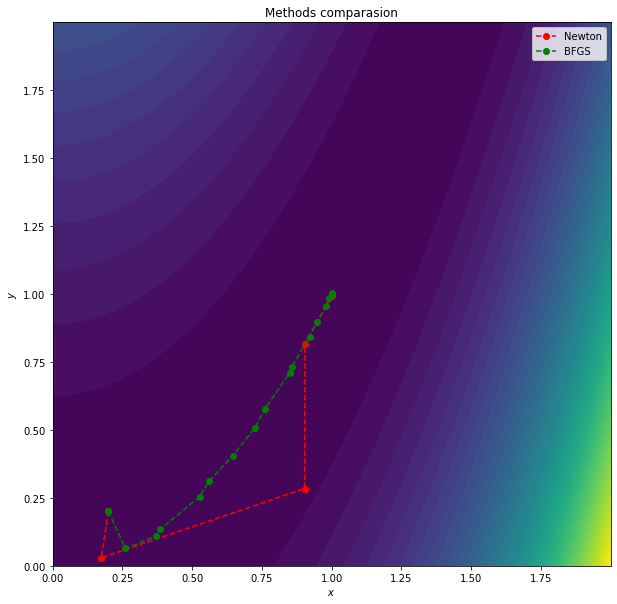

In [34]:
compare_NB(np.array([0.2, 0.2]))